# Análise Exploratória dos Dados
- Vamos começar analisando na base gerada na etapa anterior
- Vamos transformar nossos dados de forma que podemos utilizá-los no modelo

In [401]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [402]:
# Importando a base
import pandas as pd
treino = pd.read_csv('/content/drive/MyDrive/projetos_portifolio/bases_portf_complexa/train_2.csv')
teste = pd.read_csv('/content/drive/MyDrive/projetos_portifolio/bases_portf_complexa/train_2.csv')

In [403]:
# Visualizando o shape das bases
print(treino.shape)
print(teste.shape)

(1460, 81)
(1460, 81)


In [404]:
# Podemos verificar novamente as informações dessa base
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [405]:
# E também a quantidade de colunas de cada tipo
treino.dtypes.value_counts()

object     44
int64      34
float64     3
dtype: int64

In [406]:
# Verificando a cardinalidade dos dados
treino.nunique().sort_values(ascending=False).head(10)

Id             1460
LotArea        1073
GrLivArea       861
BsmtUnfSF       780
1stFlrSF        753
TotalBsmtSF     721
SalePrice       663
BsmtFinSF1      637
GarageArea      441
2ndFlrSF        417
dtype: int64

- Por mais que o Id tenha uma alta cardinalidade, não vamos eliminar esse valor pois vamos usar esse dado para fazer a submissão do nosso código

- **Vamos entender melhor a variável target (SalePrice)**

In [407]:
# Visualizando a descrição estatística
treino.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [408]:
import matplotlib.pyplot as plt

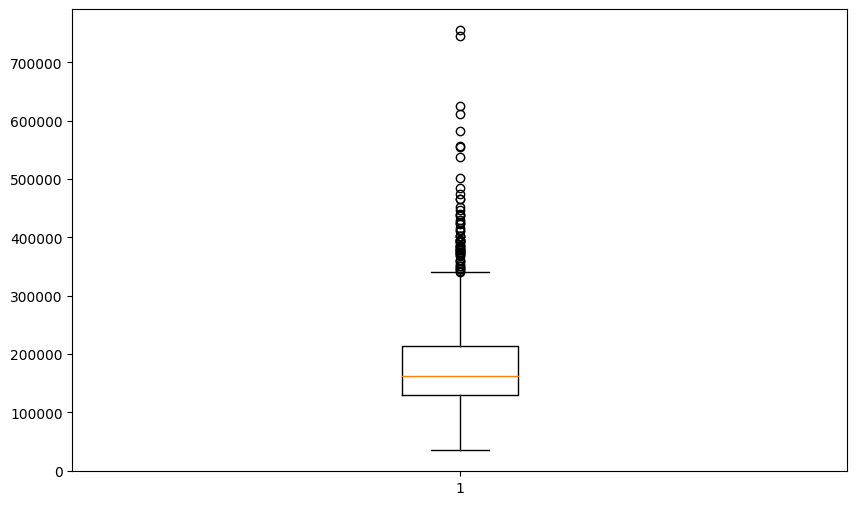

In [409]:
# Visualizando um boxplot
fig, ax = plt.subplots(figsize=(10,6))

ax.boxplot(treino.SalePrice)

plt.show()

- **Podemos avaliar diretamente a correlação das variáveis numéricas**

In [410]:
# Verificando a correlação entre os valores
treino.corr()['SalePrice'].sort_values()

<ipython-input-410-b6c0ca9f1f13>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  treino.corr()['SalePrice'].sort_values()


KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
GarageYrBlt      0.261354
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.330222
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.472614
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePrice, dtype: float64

- E visualizar graficamente
    - Vamos considerar as colunas OverallQual, BsmtHalfBath, KitchenAbvGr
    - Podemos utilizar um [gráfico de dispersão do próprio matplotlib](https://matplotlib.org/stable/plot_types/basic/scatter_plot.html#sphx-glr-plot-types-basic-scatter-plot-py)

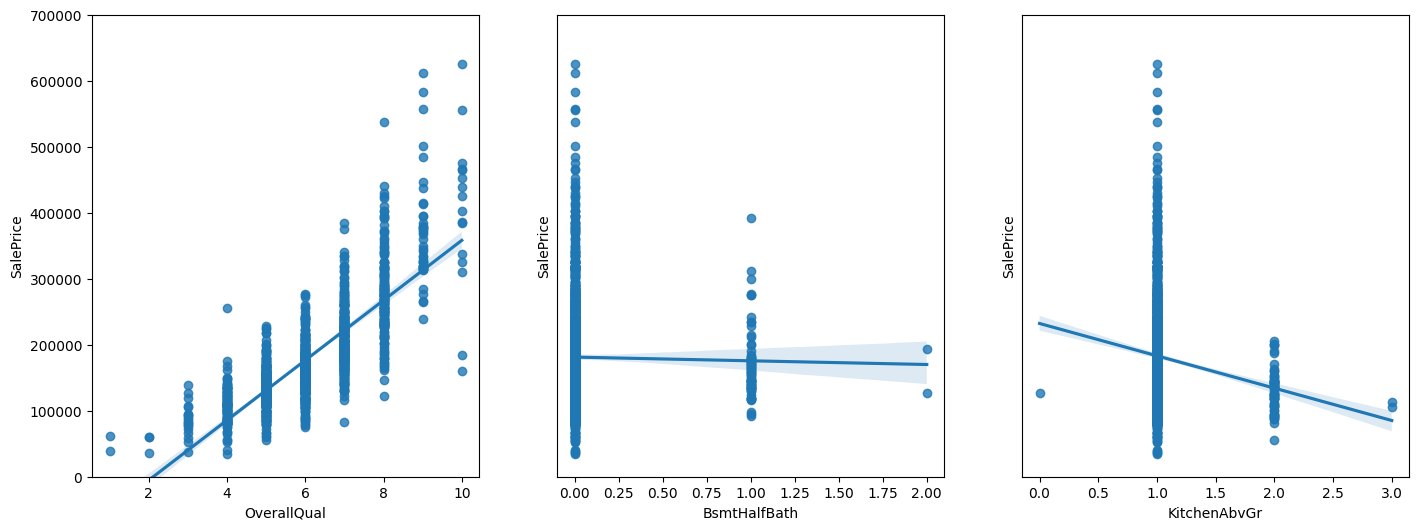

In [411]:
# Criando esse gráfico
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(ncols=3, figsize=(17, 6))

sns.regplot(data=treino, x='OverallQual', y='SalePrice', ax=ax[0])
sns.regplot(data=treino, x='BsmtHalfBath', y='SalePrice', ax=ax[1])
sns.regplot(data=treino, x='KitchenAbvGr', y='SalePrice', ax=ax[2])

ax[0].set(ylim=(0, 700000))
ax[1].set(ylim=(0, 700000), yticks=[])
ax[2].set(ylim=(0, 700000), yticks=[])
plt.show()

- Podemos visualizar a correlação na forma de mapa de calor

<ipython-input-412-69738622fdc4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(treino.corr())


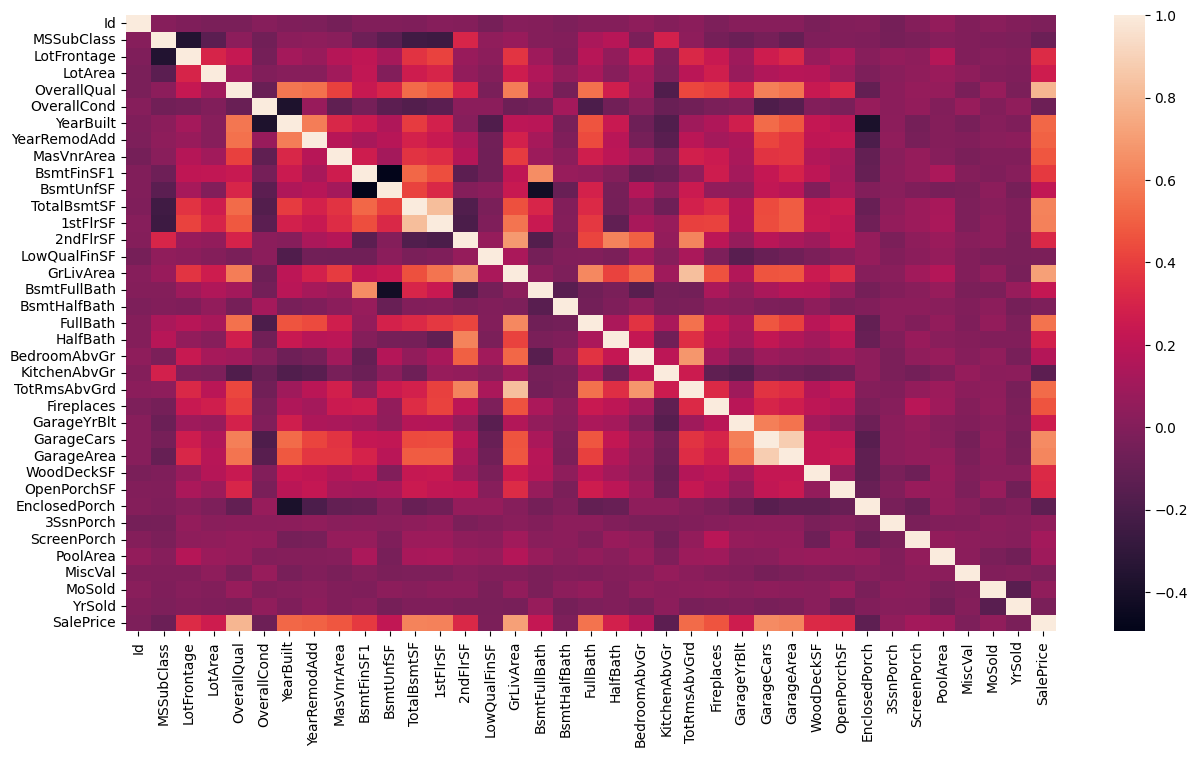

In [412]:
# Criando um mapa de calor da correlação
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(treino.corr())

plt.show()

- **E para as variáveis categóricas, podemos analisar se alguma delas possuem valores recorrentes**
    - Por exemplo, todas as casas "caras" possuem ar condicionado central e as casas "baratas" não

In [413]:
# Selecionando as colunas que vamos trabalhar
obj_cols = treino.columns[treino.dtypes == 'object']
obj_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'BsmtFinSF2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [414]:
# Visualizando as casas mais caras
casas_caras = treino.sort_values('SalePrice').tail(10)
casas_caras

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
798,799,60,RL,104.0,13518,Pave,-1,Reg,Lvl,AllPub,...,0,-1,-1,-1,0,7,2009,New,Partial,485000
178,179,20,RL,63.0,17423,Pave,-1,IR1,Lvl,AllPub,...,0,-1,-1,-1,0,7,2009,New,Partial,501837
769,770,60,RL,47.0,53504,Pave,-1,IR2,HLS,AllPub,...,0,-1,-1,-1,0,6,2010,WD,Normal,538000
440,441,20,RL,105.0,15431,Pave,-1,Reg,Lvl,AllPub,...,0,-1,-1,-1,0,4,2009,WD,Normal,555000
1046,1047,60,RL,85.0,16056,Pave,-1,IR1,Lvl,AllPub,...,0,-1,-1,-1,0,7,2006,New,Partial,556581
803,804,60,RL,107.0,13891,Pave,-1,Reg,Lvl,AllPub,...,0,-1,-1,-1,0,1,2009,New,Partial,582933
898,899,20,RL,100.0,12919,Pave,-1,IR1,Lvl,AllPub,...,0,-1,-1,-1,0,3,2010,New,Partial,611657
1169,1170,60,RL,118.0,35760,Pave,-1,IR1,Lvl,AllPub,...,0,-1,-1,-1,0,7,2006,WD,Normal,625000
1182,1183,60,RL,160.0,15623,Pave,-1,IR1,Lvl,AllPub,...,555,Ex,MnPrv,-1,0,7,2007,WD,Abnorml,745000
691,692,60,RL,104.0,21535,Pave,-1,IR1,Lvl,AllPub,...,0,-1,-1,-1,0,1,2007,WD,Normal,755000


In [415]:
# E também as casas mais baratas
casas_baratas = treino.sort_values('SalePrice').head(10)
casas_baratas

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
495,496,30,C (all),60.0,7879,Pave,-1,Reg,Lvl,AllPub,...,0,-1,GdWo,-1,0,11,2009,WD,Abnorml,34900
916,917,20,C (all),50.0,9000,Pave,-1,Reg,Lvl,AllPub,...,0,-1,-1,-1,0,10,2006,WD,Abnorml,35311
968,969,50,RM,50.0,5925,Pave,-1,Reg,Lvl,AllPub,...,0,-1,GdWo,-1,0,5,2009,WD,Abnorml,37900
533,534,20,RL,50.0,5000,Pave,-1,Reg,Low,AllPub,...,0,-1,-1,-1,0,1,2007,WD,Normal,39300
30,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,-1,MnPrv,-1,0,7,2008,WD,Normal,40000
710,711,30,RL,56.0,4130,Pave,-1,IR1,Lvl,AllPub,...,0,-1,-1,-1,0,7,2008,WD,Normal,52000
1337,1338,30,RM,153.0,4118,Pave,Grvl,IR1,Bnk,AllPub,...,0,-1,-1,-1,0,3,2006,WD,Normal,52500
705,706,190,RM,70.0,5600,Pave,-1,Reg,Lvl,AllPub,...,0,-1,-1,Othr,3500,7,2010,WD,Normal,55000
1325,1326,30,RM,40.0,3636,Pave,-1,Reg,Lvl,AllPub,...,0,-1,MnPrv,-1,0,1,2008,WD,Normal,55000
812,813,20,C (all),66.0,8712,Grvl,-1,Reg,Bnk,AllPub,...,0,-1,-1,Shed,54,6,2010,WD,Alloca,55993


In [416]:
# Selecionando somente as colunas de texto
casas_caras = casas_caras[obj_cols]
casas_baratas = casas_baratas[obj_cols]

In [417]:
# Verificando, das casas caras, valores que muito se repetem (muitos valores iguais)
caras_val = casas_caras.nunique()
caras_val.head(2)

MSZoning    1
Street      1
dtype: int64

In [418]:
# Verificando agora para as casas mais baratas
baratas_val = casas_baratas.nunique()
baratas_val.head(2)

MSZoning    3
Street      2
dtype: int64

In [419]:
# Podemos unir esses valores
rep = pd.concat([caras_val, baratas_val], axis=1).sort_values([0,1]).head(10)
rep

,0,1
Utilities,1,1
Condition2,1,1
Street,1,2
Condition1,1,2
BldgType,1,2
Heating,1,2
CentralAir,1,2
GarageQual,1,2
PavedDrive,1,2
MSZoning,1,3


In [420]:
# Agora visualizando essas colunas para as casas mais caras
casas_caras[rep.index]

,Utilities,Condition2,Street,Condition1,BldgType,Heating,CentralAir,GarageQual,PavedDrive,MSZoning
798,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
178,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
769,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
440,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
1046,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
803,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
898,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
1169,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
1182,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
691,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL


In [421]:
# E para as mais baratas
casas_baratas[rep.index]

,Utilities,Condition2,Street,Condition1,BldgType,Heating,CentralAir,GarageQual,PavedDrive,MSZoning
495,AllPub,Norm,Pave,Norm,1Fam,GasA,N,-1,N,C (all)
916,AllPub,Norm,Pave,Norm,1Fam,GasA,N,TA,Y,C (all)
968,AllPub,Norm,Pave,Norm,1Fam,Grav,N,-1,Y,RM
533,AllPub,Norm,Pave,Norm,1Fam,GasA,N,-1,N,RL
30,AllPub,Norm,Pave,Feedr,1Fam,GasA,N,TA,N,C (all)
710,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,-1,N,RL
1337,AllPub,Norm,Pave,Feedr,1Fam,Grav,N,-1,N,RM
705,AllPub,Norm,Pave,Norm,2fmCon,GasA,N,-1,N,RM
1325,AllPub,Norm,Pave,Norm,1Fam,GasA,N,-1,N,RM
812,AllPub,Norm,Grvl,Norm,1Fam,GasA,N,TA,N,C (all)


## Agora podemos investigar melhor essas principais colunas
- **Index:**
    - [Utilities](#Utilities)
    - [CentralAir](#CentralAir)
    - [PavedDrive](#PavedDrive)
    - [MSZoning](#MSZoning)
    - [GarageQual](#GarageQual)

<a id="Utilities"></a>
- <font color="blue">**Vamos começar primeiramente analisando a coluna "Utilities"**</font>

In [422]:
# Verificando os valores nessa coluna para a base de treino
treino.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [423]:
# E para a base de teste
teste.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [424]:
# Eliminando essa coluna nas 2 bases
treino = treino.drop('Utilities', axis=1)
teste = teste.drop('Utilities', axis=1)

<p style='text-align: right;'><a href="#colunas">Voltar</a></p>

<a id="CentralAir"></a>
- <font color="blue">**Analisando a coluna "CentralAir"**</font>

In [425]:
# Verificando os valores nessa coluna
treino.CentralAir.value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [426]:
# Substituindo os valores
treino['CentralAir'] = treino.CentralAir.apply(lambda x: 1 if x == 'Y' else 0)

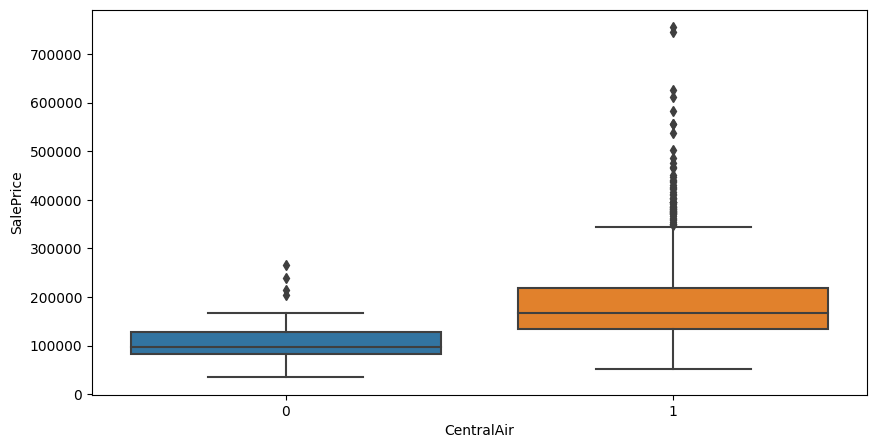

In [427]:
# Visualizando a relação com o preço
fig, ax = plt.subplots(figsize=(10, 5))

sns.boxplot(x=treino.CentralAir, y=treino.SalePrice)

plt.show()

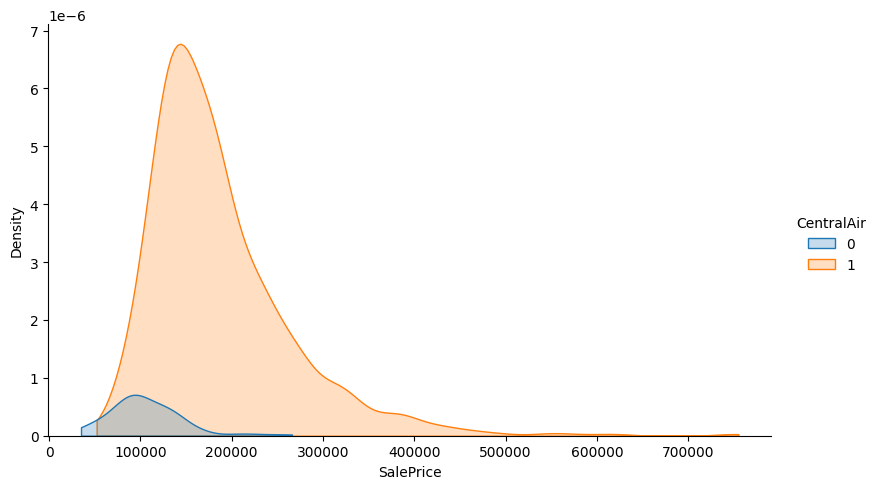

In [428]:
sns.displot(data=treino, hue='CentralAir',x='SalePrice',
            kind="kde", fill=True, aspect=1.6,
            cut=0, bw_adjust=1)

plt.show()

- O valor "N", apesar de aparecer na maioria das casas de menor valor, não é um valor tão frequente

- **Podemos transformar essa coluna simplesmente colocando tudo que for Y como 1 e N como 0**

In [429]:
# Verificando o resultado
treino.CentralAir.value_counts()

1    1365
0      95
Name: CentralAir, dtype: int64

- Fazendo o mesmo para a **<font color='blue'>base de teste</font>**

In [430]:
# Aplicando a função na base de teste
teste['CentralAir'] = teste.CentralAir.apply(lambda x: 1 if x == 'Y' else 0)

<p style='text-align: right;'><a href="#colunas">Voltar</a></p>

<a id="PavedDrive"></a>
- <font color="blue">**E também analisar a coluna "PavedDrive"** (calçada pavimentada)</font>
    - Y: Paved
    - P: Partial Pavement
    - N: Dirt/Gravel

In [431]:
# Verificando os valores nessa coluna
treino.PavedDrive.value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

In [432]:
# Determinando a coluna analisada
coluna = 'PavedDrive'

In [433]:
# Verificando a relação desses valores com o preço da casa
# fig, ax = plt.subplots(ncols=2, figsize=(15, 5))

# sns.boxplot(x=treino[coluna], y=treino.SalePrice, ax=ax[0])
# sns.kdeplot(treino.SalePrice,hue=treino[coluna], ax=ax[1])

# plt.show()

- **Podemos criar uma função capaz de transformar esses valores de texto em números**

In [434]:
# Criando a função
def DefinePavimento(texto):
    if texto == 'Y':
        return 1
    elif texto == 'P':
        return 0.5
    elif texto == 'N':
        return 0
    else:
        return -1

In [435]:
# Aplicando essa função
treino['check_pavimento'] = treino.PavedDrive
treino['PavedDrive'] = treino.PavedDrive.apply(DefinePavimento)

In [436]:
# Verificando o resultado
treino[['check_pavimento', 'PavedDrive']].value_counts()

check_pavimento  PavedDrive
Y                1.0           1340
N                0.0             90
P                0.5             30
dtype: int64

In [437]:
# Agora podemos apagar a coluna Check
treino = treino.drop('check_pavimento', axis=1)

- E para a **<font color='blue'>base de teste</font>**

In [438]:
# Fazendo para a base de teste
teste['PavedDrive'] = teste.PavedDrive.apply(DefinePavimento)

<p style='text-align: right;'><a href="#colunas">Voltar</a></p>

<a id="MSZoning"></a>
- <font color="blue">**Agora podemos entender a relação do "MSZoning" com o preço**</font>

In [439]:
# Fazendo um groupby desses dados para ver a média
treino.groupby('MSZoning')['SalePrice'].mean()

MSZoning
C (all)     74528.000000
FV         214014.061538
RH         131558.375000
RL         191004.994787
RM         126316.830275
Name: SalePrice, dtype: float64

In [440]:
# Visualizando também mínimo, máximo e contagem
treino.groupby('MSZoning')['SalePrice'].agg(['mean', 'max', 'count'])

,mean,max,count
MSZoning,,,
C (all),74528.000000,133900,10
FV,214014.061538,370878,65
RH,131558.375000,200000,16
RL,191004.994787,755000,1151
RM,126316.830275,475000,218


In [441]:
# Podemos inclusive visualizar a distribuição desses valores
# coluna = 'MSZoning'
# fig, ax = plt.subplots(ncols=2, figsize=(15, 5))

# sns.boxplot(x=treino[coluna], y=treino.SalePrice, ax=ax[0])
# sns.kdeplot(treino.SalePrice,hue=treino[coluna], ax=ax[1])

# plt.show()

- **Para resolver o problema de variáveis textuais, podemos utilizar agora o OneHotEncoder e transformar cada um desses valores em uma nova coluna**
    - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [442]:
# Importando
from sklearn.preprocessing import OneHotEncoder

In [443]:
# Criando o encoder para essa coluna
ohe_MSZoning = OneHotEncoder(handle_unknown='ignore')

In [444]:
# Fazendo o fit com os dados
ohe_MSZoning = ohe_MSZoning.fit(treino[['MSZoning']])

In [445]:
# Transformando os dados
ohe_MSZoning.transform(treino[['MSZoning']]).toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

In [446]:
# Podemos transformar isso em um DataFrame do pandas
ohe_MSZoning_df = pd.DataFrame(
    ohe_MSZoning.transform(treino[['MSZoning']]).toarray(),
    columns=ohe_MSZoning.get_feature_names_out()
)
ohe_MSZoning_df

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
1455,0.0,0.0,0.0,1.0,0.0
1456,0.0,0.0,0.0,1.0,0.0
1457,0.0,0.0,0.0,1.0,0.0
1458,0.0,0.0,0.0,1.0,0.0


In [447]:
# Unindo essa coluna com a base
treino = pd.concat([treino, ohe_MSZoning_df], axis=1)

In [448]:
# Verificando o resultado
treino.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,1,60,RL,65.0,8450,Pave,-1,Reg,Lvl,Inside,...,2,2008,WD,Normal,208500,0.0,0.0,0.0,1.0,0.0
1,2,20,RL,80.0,9600,Pave,-1,Reg,Lvl,FR2,...,5,2007,WD,Normal,181500,0.0,0.0,0.0,1.0,0.0
2,3,60,RL,68.0,11250,Pave,-1,IR1,Lvl,Inside,...,9,2008,WD,Normal,223500,0.0,0.0,0.0,1.0,0.0


In [449]:
# Eliminando a coluna "MSZoning"
treino = treino.drop('MSZoning', axis=1)

- Agora utilizando o mesmo encoder para a **<font color='blue'>base de teste</font>**

In [450]:
# Fazendo a transformação
ohe_MSZoning.transform(teste[['MSZoning']]).toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

In [451]:
# Transformando em um DataFrame (podemos sobrescrever essa variável)
ohe_MSZoning_df = pd.DataFrame(
    ohe_MSZoning.transform(teste[['MSZoning']]).toarray(),
    columns=ohe_MSZoning.get_feature_names_out()
)
ohe_MSZoning_df

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
1455,0.0,0.0,0.0,1.0,0.0
1456,0.0,0.0,0.0,1.0,0.0
1457,0.0,0.0,0.0,1.0,0.0
1458,0.0,0.0,0.0,1.0,0.0


In [452]:
# Unindo essa coluna com a base de teste
teste = pd.concat([teste, ohe_MSZoning_df], axis=1)

In [453]:
# Verificando o resultado
teste.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,1,60,RL,65.0,8450,Pave,-1,Reg,Lvl,Inside,...,2,2008,WD,Normal,208500,0.0,0.0,0.0,1.0,0.0
1,2,20,RL,80.0,9600,Pave,-1,Reg,Lvl,FR2,...,5,2007,WD,Normal,181500,0.0,0.0,0.0,1.0,0.0
2,3,60,RL,68.0,11250,Pave,-1,IR1,Lvl,Inside,...,9,2008,WD,Normal,223500,0.0,0.0,0.0,1.0,0.0


In [454]:
# Eliminando a coluna "MSZoning"
teste = teste.drop('MSZoning', axis=1)

<p style='text-align: right;'><a href="#colunas">Voltar</a></p>

<a id="GarageQual"></a>
- <font color="blue">**Analisando as informações sobre garagem, começando pela "GarageQual"**</font>
    - Ex: Excellent
    - Gd: Good
    - TA: Typical/Average
    - Fa: Fair
    - Po: Poor
    - NA: No Garage -> lembrando que já substituimos esse valor por -1

In [455]:
# Verificando os valores nessa coluna
treino.GarageQual.value_counts()

TA    1311
-1      81
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [456]:
# Visualizando graficamente
# coluna = 'GarageQual'
# fig, ax = plt.subplots(ncols=2, figsize=(15, 5))

# sns.boxplot(x=treino[coluna], y=treino.SalePrice, ax=ax[0])
# sns.kdeplot(treino.SalePrice,hue=treino[coluna], ax=ax[1])

# plt.show()

- **Ao ir no arquivo data_description, percebemos que existem várias colunas de garagem (também percebemos isso na etapa de Data Cleaning), então podemos visualizar essas informações**

In [457]:
# Verificando as colunas que possuem garagem no nome
col_garagem = treino.columns[treino.columns.str.contains('Garage')]
col_garagem

Index(['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [458]:
# Visualizando os valores nessa base
treino[col_garagem]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
0,Attchd,2003.0,RFn,2,548,TA,TA
1,Attchd,1976.0,RFn,2,460,TA,TA
2,Attchd,2001.0,RFn,2,608,TA,TA
3,Detchd,1998.0,Unf,3,642,TA,TA
4,Attchd,2000.0,RFn,3,836,TA,TA
...,...,...,...,...,...,...,...
1455,Attchd,1999.0,RFn,2,460,TA,TA
1456,Attchd,1978.0,Unf,2,500,TA,TA
1457,Attchd,1941.0,RFn,1,252,TA,TA
1458,Attchd,1950.0,Unf,1,240,TA,TA


In [459]:
# Fazendo o value_counts
treino[['GarageQual', 'GarageCond']].value_counts()

GarageQual  GarageCond
TA          TA            1291
-1          -1              81
Fa          TA              24
            Fa              20
TA          Fa              15
Gd          TA              10
TA          Gd               5
Fa          Po               4
Gd          Gd               4
Po          Po               3
Ex          Ex               2
            TA               1
dtype: int64

In [460]:
treino[treino.GarageQual == treino.GarageCond].shape[0]/treino.shape[0]

0.9595890410958904

- **Podemos apagar a coluna "GarageCond" pois a informação nessa coluna diz basicamente a mesma coisa que a coluna "GarageQual"**

In [461]:
# Apagando a coluna GarageCond
treino = treino.drop('GarageCond', axis=1)

- **Da mesma forma, também podemos analisar a relação entre "GarageCars" e "GarageArea"**

In [462]:
# Analisando a correlação entre as duas colunas e o preço
treino.corr()['SalePrice'].sort_values()[['GarageCars', 'GarageArea']]


<ipython-input-462-c37c21d24077>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  treino.corr()['SalePrice'].sort_values()[['GarageCars', 'GarageArea']]


GarageCars    0.640409
GarageArea    0.623431
Name: SalePrice, dtype: float64

In [463]:
# Analisando a correlação entre as duas colunas e o preço
treino[['GarageCars', 'GarageArea', 'SalePrice']].corr()

,GarageCars,GarageArea,SalePrice
GarageCars,1.000000,0.882475,0.640409
GarageArea,0.882475,1.000000,0.623431
SalePrice,0.640409,0.623431,1.000000


In [464]:
# Eliminando a coluna GarageArea
treino = treino.drop('GarageArea', axis=1)

In [465]:
# Verificando as colunas que possuem garagem no nome
treino.columns[treino.columns.str.contains('Garage')]

Index(['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageQual'],
      dtype='object')

- **Podemos continuar tratando as colunas de garagem, mas relacionando com outras informações da base como "YearBuilt" e "YearRemodAdd"**

In [466]:
# Analisando a correlação entre as datas de construção
treino[['GarageYrBlt', 'YearBuilt', 'YearRemodAdd', 'SalePrice']].corr()


,GarageYrBlt,YearBuilt,YearRemodAdd,SalePrice
GarageYrBlt,1.000000,0.272009,0.146341,0.261354
YearBuilt,0.272009,1.000000,0.592855,0.522897
YearRemodAdd,0.146341,0.592855,1.000000,0.507101
SalePrice,0.261354,0.522897,0.507101,1.000000


In [467]:
# Retirando da base os valores onde o ano é -1 (sem garagem)
treino.loc[treino['GarageYrBlt'] != -1,  ['GarageYrBlt', 'YearBuilt', 'YearRemodAdd', 'SalePrice']].corr()

,GarageYrBlt,YearBuilt,YearRemodAdd,SalePrice
GarageYrBlt,1.000000,0.825667,0.642277,0.486362
YearBuilt,0.825667,1.000000,0.618058,0.507584
YearRemodAdd,0.642277,0.618058,1.000000,0.505434
SalePrice,0.486362,0.507584,0.505434,1.000000


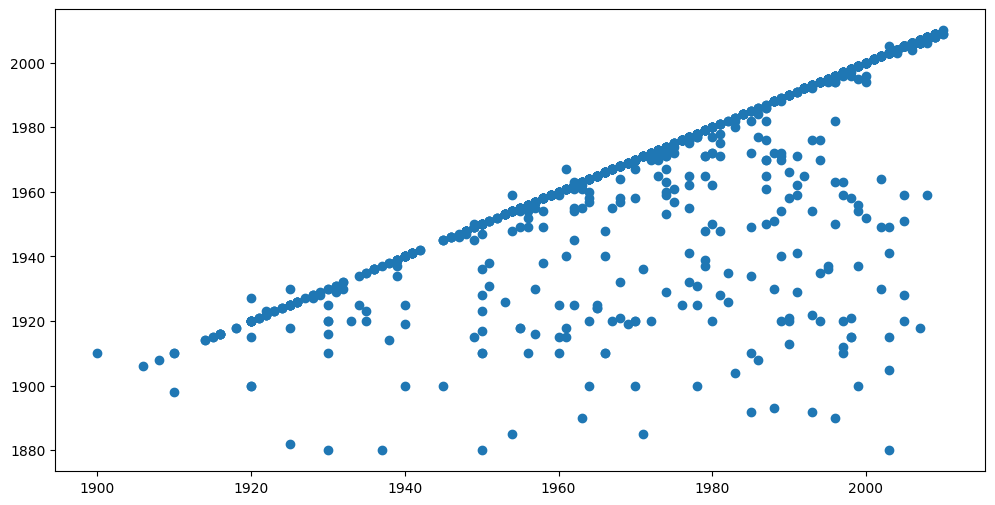

In [468]:
# Visualizando essa correlação
fig, ax = plt.subplots(figsize=(12, 6))
filtro1 = treino.loc[treino.GarageYrBlt != -1, 'GarageYrBlt']
filtro2 = treino.loc[treino.GarageYrBlt != -1, 'YearBuilt']


ax.scatter(filtro1, filtro2)

plt.show()

In [469]:
# Também podemos eliminar essa coluna de GarageYrBlt
treino = treino.drop('GarageYrBlt', axis=1)

In [470]:
# Colunas de garagem restantes
treino.columns[treino.columns.str.contains('Garage')]

Index(['GarageType', 'GarageFinish', 'GarageCars', 'GarageQual'], dtype='object')

In [471]:
# Lembrando os tipos de dados encontrados em cada uma das colunas
treino[['GarageType', 'GarageFinish', 'GarageCars', 'GarageQual']].dtypes

GarageType      object
GarageFinish    object
GarageCars       int64
GarageQual      object
dtype: object

- **Por fim, podemos continuar tratando as colunas de garagem ou apenas transformar o restante das colunas de texto**
    - Utilizando o OneHotEncoder para a coluna "GarageType"
        - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
    - E o OrdinalEncoder para as colunas "GarageFinish" e "GarageQual"
        - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html

In [472]:
# Visualizando os valores em "GarageType"
treino.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
-1          81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [473]:
# Criando um encoder para GarageType
ohe_GarageType = OneHotEncoder(handle_unknown='ignore', min_frequency=25)

In [474]:
# Fazendo o fit
ohe_GarageType = ohe_GarageType.fit(treino[['GarageType']])

In [475]:
# Fazendo o transform já em um DataFrame
ohe_GarageType_df = pd.DataFrame(
    ohe_GarageType.transform(treino[['GarageType']]).toarray(),
    columns=ohe_GarageType.get_feature_names_out()
)
ohe_GarageType_df

,GarageType_-1,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_infrequent_sklearn
0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
1455,0.0,1.0,0.0,0.0,0.0
1456,0.0,1.0,0.0,0.0,0.0
1457,0.0,1.0,0.0,0.0,0.0
1458,0.0,1.0,0.0,0.0,0.0


In [476]:
# Unindo essa coluna com a base
treino = pd.concat([treino, ohe_GarageType_df], axis=1)

In [477]:
# Eliminando a coluna "GarageType"
treino = treino.drop('GarageType', axis=1)

- Vamos fazer o OrdinalEncoder para as outras 2 colunas
    - GarageFinish: Interior finish of the garage
        - Fin: Finished
        - RFn: Rough Finished
        - Unf: Unfinished
        - NA: No Garage -> usamos o -1
    - GarageQual: Garage quality
        - Ex: Excellent
        - Gd: Good
        - TA: Typical/Average
        - Fa: Fair
        - Po: Poor
        - NA: No Garage

In [478]:
# # Criando a lista de ordem dos valores
list_ord_finish = ['Unf', 'RFn', 'Fin']
list_ord_qual = ['Po', 'Fa', 'TA', 'Gd', 'Ex']

In [479]:
# # Importando o OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder

In [480]:
# Criando o encoder
enc_garagem = OrdinalEncoder(
    categories=[list_ord_finish, list_ord_qual],
    handle_unknown='use_encoded_value',
    unknown_value=-1, dtype='int32',
)

In [481]:
# Fazendo o fit com os dados
enc_garagem = enc_garagem.fit(treino[['GarageFinish', 'GarageQual']])

In [482]:
# Transformando
enc_garagem.transform(treino[['GarageFinish', 'GarageQual']])

array([[1, 2],
       [1, 2],
       [1, 2],
       ...,
       [1, 2],
       [0, 2],
       [2, 2]], dtype=int32)

In [483]:
# Atribuindo os valores a base original
treino[['GarageFinish', 'GarageQual']] = enc_garagem.transform(treino[['GarageFinish', 'GarageQual']])

In [484]:
# Visualizando o resultado
treino[['GarageFinish', 'GarageQual']]

,GarageFinish,GarageQual
0,1,2
1,1,2
2,1,2
3,0,2
4,1,2
...,...,...
1455,1,2
1456,0,2
1457,1,2
1458,0,2


- Fazendo todos os tratamentos para a **<font color='blue'>base de teste</font>**

In [485]:
# Apagando a coluna "GarageCond"
teste = teste.drop('GarageCond', axis=1)

In [486]:
# Eliminando a coluna GarageArea
teste = teste.drop('GarageArea', axis=1)

In [487]:
# Também podemos eliminar essa coluna de GarageYrBlt
teste = teste.drop('GarageYrBlt', axis=1)

In [488]:
# Utilizando o encoder do 'GarageType'
ohe_GarageType_df = pd.DataFrame(
    ohe_GarageType.transform(teste[['GarageType']]).toarray(),
    columns=ohe_GarageType.get_feature_names_out()
)

teste = pd.concat([teste, ohe_GarageType_df], axis=1)

teste = teste.drop('GarageType', axis=1)

In [489]:
# Utilizando o OrdinalEncoder para as colunas 'GarageFinish' e 'GarageQual'
teste[['GarageFinish', 'GarageQual']] = enc_garagem.transform(teste[['GarageFinish', 'GarageQual']])

## Finalizando o tratamento das outras colunas que ainda estão como texto

In [490]:
# Verificando novamente a quantidade de colunas de cada tipo
col_object = treino.columns[treino.dtypes == 'object']
col_object

Index(['Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF2', 'Heating',
       'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

- **Podemos separar agora as colunas em 2 grupos: um que podemos fazer o OneHotEncoder e outra que podemos fazer o OrdinalEncoder**

In [491]:
# Separando as colunas pelos índices
index_ohe = [0,1,3,4,6,7,8,9,10,11,12,13,14,15,18,24,26,28,31,32,33,34,35]
index_oe = [2,5,16,17,19,20,21,22,23,25,27,29,30]

In [492]:
treino.SaleCondition.value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [493]:
# Podemos visualizar as colunas do ohe
cols_ohe = col_object[index_ohe]
cols_ohe

Index(['Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'BsmtFinSF2', 'HeatingQC', 'KitchenQual', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [494]:
# E do oe
cols_oe = col_object[index_oe]
cols_oe

Index(['LotShape', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'Electrical', 'Functional', 'FireplaceQu'],
      dtype='object')

In [495]:
# Definindo a ordem dos valores de cada coluna do OrdinalEncoder
dados_oe = []
dados_oe.append(['IR3', 'IR2', 'IR1', 'Reg']) #LotShape
dados_oe.append(['Gtl', 'Mod', 'Set']) #LandSlope
dados_oe.append(['Po', 'Fa', 'TA', 'Gd', 'Ex']) #ExterQual
dados_oe.append(['Po', 'Fa', 'TA', 'Gd', 'Ex']) #ExterCond
dados_oe.append(['Po', 'Fa', 'TA', 'Gd', 'Ex']) #BsmtQual
dados_oe.append(['Po', 'Fa', 'TA', 'Gd', 'Ex']) #BsmtCond
dados_oe.append(['No', 'Mn', 'Av', 'Gd']) #BsmtExposure
dados_oe.append(['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']) #BsmtFinType1
dados_oe.append(['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']) #BsmtFinType2
dados_oe.append(['Po', 'Fa', 'TA', 'Gd', 'Ex']) #HeatingQC
dados_oe.append(['Po', 'Fa', 'TA', 'Gd', 'Ex']) #KitchenQual
dados_oe.append(['Po', 'Fa', 'TA', 'Gd', 'Ex']) #FireplaceQu
dados_oe.append(['Po', 'Fa', 'TA', 'Gd', 'Ex']) #PoolQC



- **Fazendo o OneHotEncoder**

In [496]:
# Criando o encoder
ohe = OneHotEncoder(
    handle_unknown='infrequent_if_exist',
    min_frequency=50,
    drop='if_binary',
    dtype='int64',
    )

In [497]:
# Selecionando a base do ohe
dados_ohe  = treino[cols_ohe]
dados_ohe.head(3)

,Street,Alley,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,...,MasVnrType,Foundation,BsmtFinSF2,HeatingQC,KitchenQual,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,Pave,-1,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,...,BrkFace,PConc,0,Ex,Gd,-1,-1,-1,WD,Normal
1,Pave,-1,Lvl,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,...,None,CBlock,0,Ex,TA,-1,-1,-1,WD,Normal
2,Pave,-1,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,...,BrkFace,PConc,0,Ex,Gd,-1,-1,-1,WD,Normal


In [498]:
# Fazando o fit
ohe = ohe.fit(dados_ohe)

In [499]:
# Fazendo o transform já em um DataFrame
ohe_df = pd.DataFrame(
    ohe.transform(dados_ohe).toarray(),
    columns= ohe.get_feature_names_out(),
    )
ohe_df.head(3)

,Street_infrequent_sklearn,Alley_-1,Alley_Grvl,Alley_infrequent_sklearn,LandContour_Bnk,LandContour_HLS,LandContour_Lvl,LandContour_infrequent_sklearn,LotConfig_Corner,LotConfig_CulDSac,...,Fence_MnPrv,Fence_infrequent_sklearn,MiscFeature_infrequent_sklearn,SaleType_New,SaleType_WD,SaleType_infrequent_sklearn,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_infrequent_sklearn
0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [500]:
# Unindo essa coluna com a base
treino = pd.concat([treino, ohe_df], axis=1)

- Para os **<font color='blue'>dados de teste</font>**

In [501]:
# Selecionando a base do ohe
dados_ohe_teste = teste[cols_ohe]
dados_ohe_teste.head(3)

,Street,Alley,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,...,MasVnrType,Foundation,BsmtFinSF2,HeatingQC,KitchenQual,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,Pave,-1,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,...,BrkFace,PConc,0,Ex,Gd,-1,-1,-1,WD,Normal
1,Pave,-1,Lvl,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,...,None,CBlock,0,Ex,TA,-1,-1,-1,WD,Normal
2,Pave,-1,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,...,BrkFace,PConc,0,Ex,Gd,-1,-1,-1,WD,Normal


In [502]:
# Fazendo o ohe para teste
ohe_df = pd.DataFrame(
    ohe.transform(dados_ohe_teste).toarray(),
    columns=ohe.get_feature_names_out(),
)

teste = pd.concat([teste, ohe_df], axis=1)
teste.head(3)

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,Fence_MnPrv,Fence_infrequent_sklearn,MiscFeature_infrequent_sklearn,SaleType_New,SaleType_WD,SaleType_infrequent_sklearn,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_infrequent_sklearn
0,1,60,65.0,8450,Pave,-1,Reg,Lvl,Inside,Gtl,...,0,0,0,0,1,0,0,1,0,0
1,2,20,80.0,9600,Pave,-1,Reg,Lvl,FR2,Gtl,...,0,0,0,0,1,0,0,1,0,0
2,3,60,68.0,11250,Pave,-1,IR1,Lvl,Inside,Gtl,...,0,0,0,0,1,0,0,1,0,0


- **Fazendo o OrdinalEncoder**

In [503]:
# Criando o encoder
oe = OrdinalEncoder(
    categories=dados_oe,
    handle_unknown='use_encoded_value',
    unknown_value=-1,
    dtype='int64',
)

In [504]:
# Selecionando a base do oe
dados_treino_oe = treino[cols_oe]
dados_treino_oe

,LotShape,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,Electrical,Functional,FireplaceQu
0,Reg,Gtl,Gd,TA,Gd,TA,No,GLQ,Unf,GasA,SBrkr,Typ,-1
1,Reg,Gtl,TA,TA,Gd,TA,Gd,ALQ,Unf,GasA,SBrkr,Typ,TA
2,IR1,Gtl,Gd,TA,Gd,TA,Mn,GLQ,Unf,GasA,SBrkr,Typ,TA
3,IR1,Gtl,TA,TA,TA,Gd,No,ALQ,Unf,GasA,SBrkr,Typ,Gd
4,IR1,Gtl,Gd,TA,Gd,TA,Av,GLQ,Unf,GasA,SBrkr,Typ,TA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Reg,Gtl,TA,TA,Gd,TA,No,Unf,Unf,GasA,SBrkr,Typ,TA
1456,Reg,Gtl,TA,TA,Gd,TA,No,ALQ,Rec,GasA,SBrkr,Min1,TA
1457,Reg,Gtl,Ex,Gd,TA,Gd,No,GLQ,Unf,GasA,SBrkr,Typ,Gd
1458,Reg,Gtl,TA,TA,TA,TA,Mn,GLQ,Rec,GasA,FuseA,Typ,-1


In [505]:
# Fazando o fit
oe = oe.fit(dados_treino_oe)

In [506]:
# Fazendo o transform já na base
treino[cols_oe] = oe.transform(dados_treino_oe)

In [507]:
treino.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,Fence_MnPrv,Fence_infrequent_sklearn,MiscFeature_infrequent_sklearn,SaleType_New,SaleType_WD,SaleType_infrequent_sklearn,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_infrequent_sklearn
0,1,60,65.0,8450,Pave,-1,3,Lvl,Inside,0,...,0,0,0,0,1,0,0,1,0,0
1,2,20,80.0,9600,Pave,-1,3,Lvl,FR2,0,...,0,0,0,0,1,0,0,1,0,0
2,3,60,68.0,11250,Pave,-1,2,Lvl,Inside,0,...,0,0,0,0,1,0,0,1,0,0
3,4,70,60.0,9550,Pave,-1,2,Lvl,Corner,0,...,0,0,0,0,1,0,1,0,0,0
4,5,60,84.0,14260,Pave,-1,2,Lvl,FR2,0,...,0,0,0,0,1,0,0,1,0,0


- Também para os dados de teste

In [508]:
# Selecionando a base do oe
dados_oe_teste = teste[cols_oe]
dados_oe_teste.head(3)

,LotShape,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,Electrical,Functional,FireplaceQu
0,Reg,Gtl,Gd,TA,Gd,TA,No,GLQ,Unf,GasA,SBrkr,Typ,-1
1,Reg,Gtl,TA,TA,Gd,TA,Gd,ALQ,Unf,GasA,SBrkr,Typ,TA
2,IR1,Gtl,Gd,TA,Gd,TA,Mn,GLQ,Unf,GasA,SBrkr,Typ,TA


In [509]:
# Transformando
teste[cols_oe] = oe.transform(dados_oe_teste)

- **Eliminando as colunas do ohe**
    - Vamos eliminar só agora para não ter problema com os índices que usamos acima

In [510]:
# Eliminando as colunas do ohe
treino = treino.drop(cols_ohe, axis=1)
teste = teste.drop(cols_ohe, axis=1)

- **Para finalizar, podemos extrair essa base para o excel**

In [515]:
# Exportando para o excel
treino.to_csv('/content/drive/MyDrive/projetos_portifolio/bases_portf_complexa/train_3.csv')
teste.to_csv('/content/drive/MyDrive/projetos_portifolio/bases_portf_complexa/teste_3.csv')